# K-means clustering

## Import the relevant libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the data

In [25]:
data = pd.read_excel('australian_cities.xlsx')

In [26]:
data

,City,Latitude,Longitude
0,Sydney,-33.8688,151.2093
1,Melbourne,-37.8136,144.9631
2,Perth,-31.9505,115.8605
3,Darwin,-12.4634,130.8456
4,Brisbane,-27.4698,153.0251
5,Canberra,-35.2809,149.1300
6,Adelaide,-34.9285,138.6007


## Plot the data

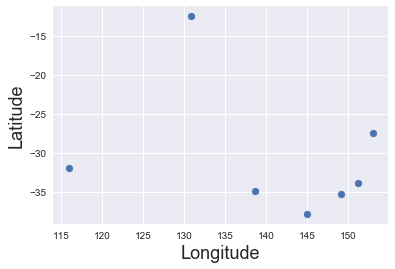

In [27]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.show()

## Perform K-means clustering  

### Select the features

In [28]:
x = data[['Latitude', 'Longitude']]

In [29]:
x

,Latitude,Longitude
0,-33.8688,151.2093
1,-37.8136,144.9631
2,-31.9505,115.8605
3,-12.4634,130.8456
4,-27.4698,153.0251
5,-35.2809,149.1300
6,-34.9285,138.6007


### Clustering

In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(6)

In [31]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Clustering results

In [32]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 3, 1, 2, 4, 0, 5], dtype=int32)

In [33]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,City,Latitude,Longitude,Cluster
0,Sydney,-33.8688,151.2093,0
1,Melbourne,-37.8136,144.9631,3
2,Perth,-31.9505,115.8605,1
3,Darwin,-12.4634,130.8456,2
4,Brisbane,-27.4698,153.0251,4
5,Canberra,-35.2809,149.1300,0
6,Adelaide,-34.9285,138.6007,5


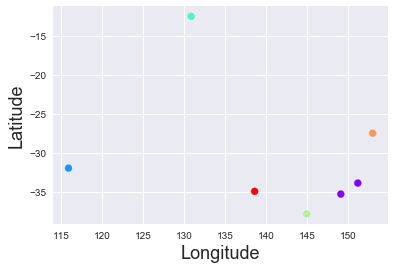

In [34]:
plt.scatter(data['Longitude'],data['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlabel('Longitude', fontsize=18)
plt.ylabel('Latitude', fontsize=18)
plt.show()

## Selecting the appropriate number of clusters (Elbow method) 

### WCSS

In [36]:
kmeans.inertia_

3.1587574500000404

In [37]:
wcss = []

for i in range(1,8):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [38]:
wcss

[1513.780895985715,
 494.28626835000023,
 192.13612414000039,
 66.650945471666802,
 27.560725335000093,
 3.1587574500000404,
 0.0]

### The Elbow Method

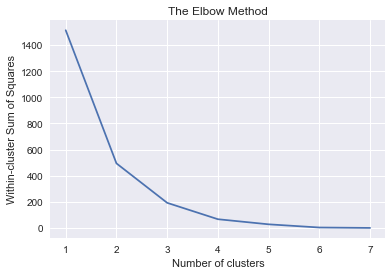

In [39]:
number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.savefig('elbow_method.pdf')
plt.show()